## **Modulos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier

# Testes
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

## **Leitura do Dataset**

In [3]:
df = pd.read_csv("train_Competição_Analytics_vidhya.csv")

In [4]:
test = pd.read_csv('test_Competição_Analytics_vidhya.csv')

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Tratamento dos dados faltantes**

In [9]:
#Dados Faltantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Tratando os dados faltantes das colunas numericas
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [11]:
#Podemos observar que foram retirados os dados faltantes LoanAmount, Loan_Amount_Term, credit_History
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#Tratando os dados faltantes das colunas categóricas 

In [12]:
male = df["Gender"][0]
femele = df["Gender"][96]

print(f'{male}\n{femele}')

Male
Female


In [13]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [14]:
#Dados Faltantes
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Visualização dos dados categóricos**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

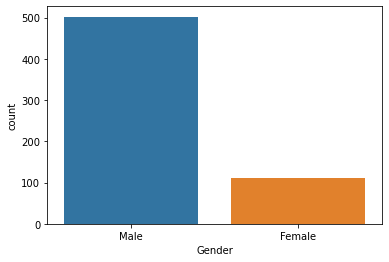

In [16]:
### **Visualização dos dados categóricos**
sns.countplot(df["Gender"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

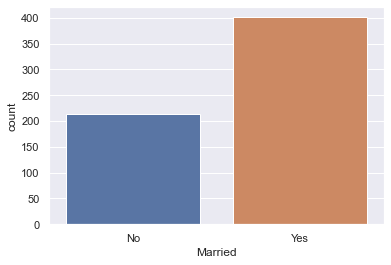

In [425]:
sns.countplot(df["Married"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

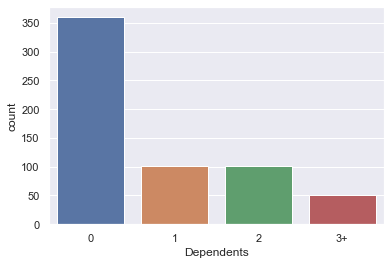

In [426]:
sns.countplot(df["Dependents"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

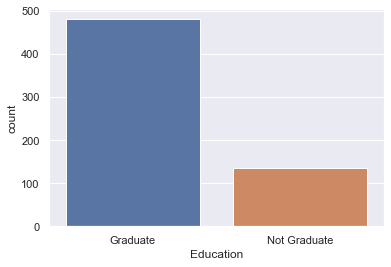

In [427]:
sns.countplot(df["Education"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

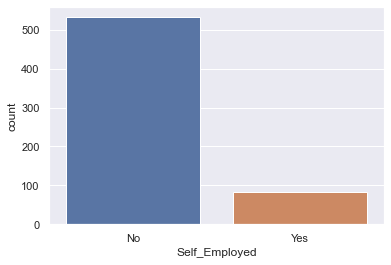

In [428]:
sns.countplot(df["Self_Employed"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

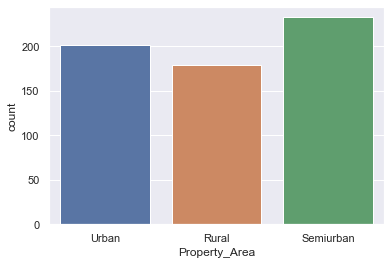

In [429]:
sns.countplot(df["Property_Area"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

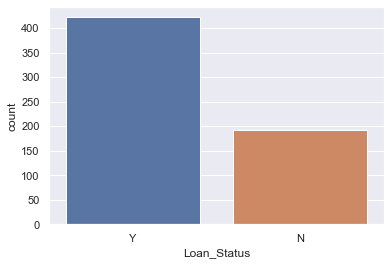

In [430]:
sns.countplot(df["Loan_Status"])

## **Tratamento dos dados** | Normalizando


### **Método StandardScaler**

In [18]:
#Separando dados categóricos de dados numéricos
dados_categoricos = df[["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]]

In [19]:
dados_categoricos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [20]:
dados_numericos = df.drop(["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"],axis=1)

In [21]:
dados_numericos.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [22]:
scalex = StandardScaler()

In [23]:
df_normalizado = scalex.fit_transform(dados_numericos)

In [24]:
colunas = dados_numericos.columns

In [25]:
df_normalizado

array([[ 0.07299082, -0.55448733,  0.        ,  0.27985054,  0.45164045],
       [-0.13441195, -0.03873155, -0.21927331,  0.27985054,  0.45164045],
       [-0.39374734, -0.55448733, -0.957641  ,  0.27985054,  0.45164045],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121,  0.27985054,  0.45164045],
       [ 0.35706382, -0.55448733,  0.4833669 ,  0.27985054,  0.45164045],
       [-0.13441195, -0.55448733, -0.15972753,  0.27985054, -2.41044061]])

In [26]:
df_numerico_norm = pd.DataFrame(df_normalizado,columns=colunas)

In [27]:
df_numerico_norm

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,0.451640
1,-0.134412,-0.038732,-0.219273,0.279851,0.451640
2,-0.393747,-0.554487,-0.957641,0.279851,0.451640
3,-0.462062,0.251980,-0.314547,0.279851,0.451640
4,0.097728,-0.554487,-0.064454,0.279851,0.451640
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,0.451640
610,-0.212557,-0.554487,-1.267279,-2.518655,0.451640
611,0.437174,-0.472404,1.269371,0.279851,0.451640
612,0.357064,-0.554487,0.483367,0.279851,0.451640


### **Método logarítmico**

In [542]:
"""
Podemos utilizar o método com logarítmico entretanto como as colunas possuem muitos valores zero e negativos optei por utilizar o método StandarScaler
"""

'\nPodemos utilizar o método com logarítmico entretanto como as colunas possuem muitos valores zero e negativos optei por utilizar o método StandarScaler\n'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


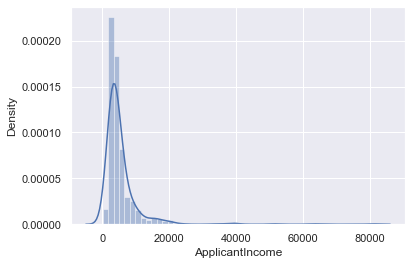

In [359]:
#ax = sns.distplot(df["ApplicantIncome"])

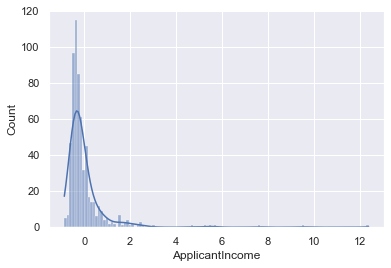

In [319]:
#Esta tendo algumas diferenças na escala do gráfico em relação distplot e histplot e nas suas nomeações com ab e ax 
#ab = sns.histplot(df_numerico_norm["ApplicantIncome"],kde=True)

In [320]:
#Tratando a escala dos dados com logarítmico
#df["ApplicantIncome"] = np.log(df["ApplicantIncome"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

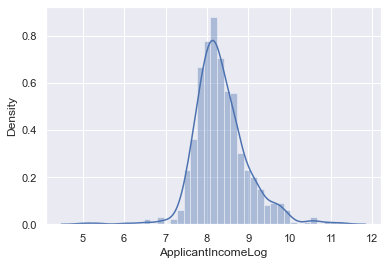

In [361]:
#Aplicando transformação com Log
"""df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

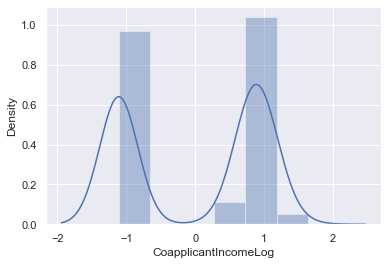

In [388]:
# Comparação com dado normalizado com from sklearn.preprocessing import Normalizer
# Podemos notar uma grande semelhança nos resultados dos métodos
#sns.distplot(df_numerico_norm["CoapplicantIncomeLog"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

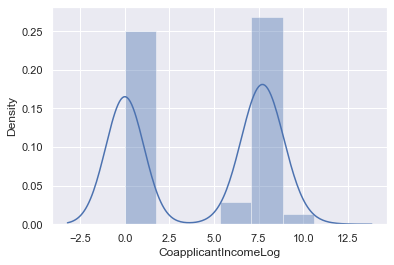

In [362]:
"""df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

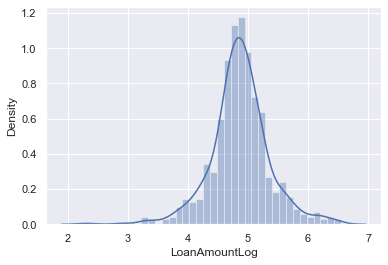

In [363]:
"""df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

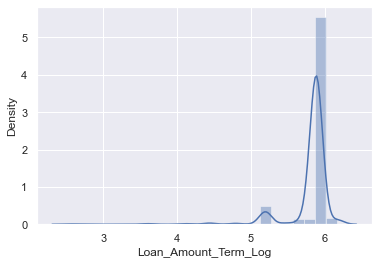

In [364]:
"""df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])"""

In [366]:
# total income
"""df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()"""

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,6000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

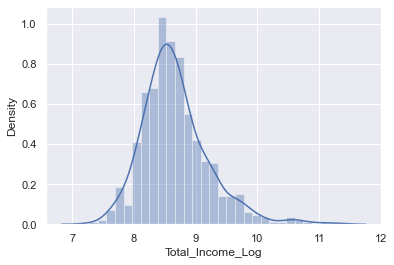

In [367]:
"""df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])"""

## **Tratamento dos dados** | Categóricos

In [443]:
dados_categoricos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [444]:
df_numerico_norm

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,0.451640
1,-0.134412,-0.038732,-0.219273,0.279851,0.451640
2,-0.393747,-0.554487,-0.957641,0.279851,0.451640
3,-0.462062,0.251980,-0.314547,0.279851,0.451640
4,0.097728,-0.554487,-0.064454,0.279851,0.451640
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,0.451640
610,-0.212557,-0.554487,-1.267279,-2.518655,0.451640
611,0.437174,-0.472404,1.269371,0.279851,0.451640
612,0.357064,-0.554487,0.483367,0.279851,0.451640


In [451]:
dados_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [449]:
# Retirando a coluna
dados_categoricos = dados_categoricos.drop("Loan_ID",axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [450]:
dados_categoricos

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [452]:

cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    dados_categoricos[col] = le.fit_transform(dados_categoricos[col])

In [454]:
dados_categoricos.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
6,1,1,0,1,0,2,1
7,1,1,3,0,0,1,0
8,1,1,2,0,0,2,1
9,1,1,1,0,0,1,0


In [455]:
df_final = pd.concat([df_numerico_norm, dados_categoricos], axis=1)

In [456]:
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.072991,-0.554487,0.000000,0.279851,0.45164,1,0,0,0,0,2,1
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164,1,1,1,0,0,0,0
2,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1,1,0,0,1,2,1
3,-0.462062,0.251980,-0.314547,0.279851,0.45164,1,1,0,1,0,2,1
4,0.097728,-0.554487,-0.064454,0.279851,0.45164,1,0,0,0,0,2,1


## **Correlações**

<AxesSubplot:>

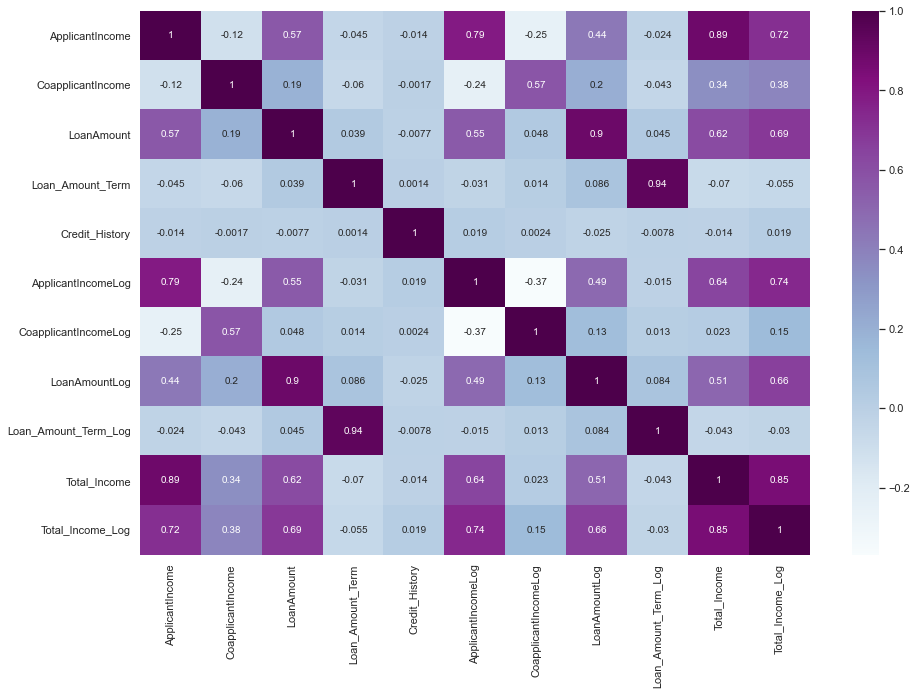

In [398]:
# Dados tratados com Log
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

<AxesSubplot:>

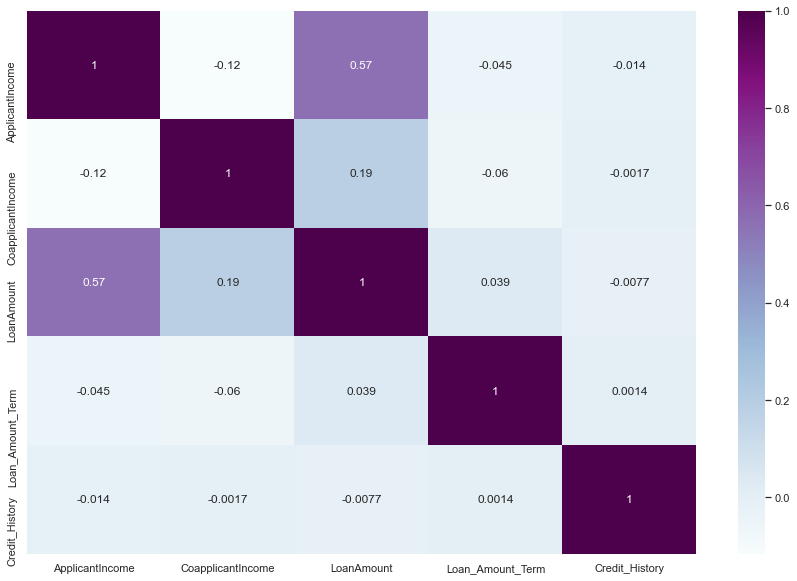

In [373]:
# Dados tratados com Log
corr_numerico = df_numerico_norm.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_numerico, annot = True, cmap="BuPu")

## **Criando função para treino de vários modelos**

In [457]:
# Separando em variaveis de resposta e entrada
X = df_final.drop(columns=['Loan_Status'], axis=1)
y = df_final['Loan_Status']

In [462]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [466]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

## **Aplicando os modelos**

In [467]:
# Modelo LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.62108489937359


In [468]:
# Modelo DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 68.83116883116884
Cross validation is 70.854324936692


In [469]:
# Modelo RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 78.99506863921098


In [523]:
#ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 76.38811142209782


**Hyperparameter tuning**

In [471]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 80.9462881514061


**Confusion Matrix**

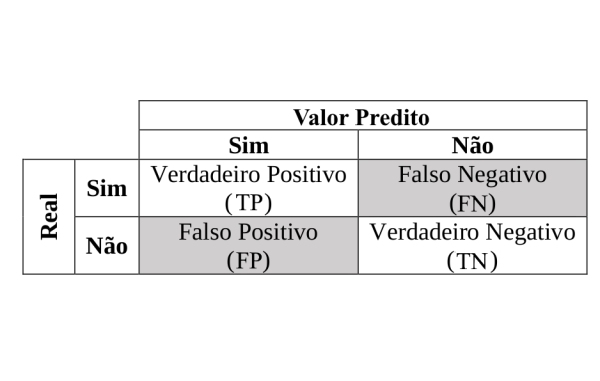

In [476]:
from PIL import Image
im = Image.open("matrizConfusao-600x381.png")
im

In [472]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [473]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 29],
       [ 7, 93]], dtype=int64)

### hiperparâmetros

**Precision**

**Precisão**: Proporção de positivos classificados corretamente, ou seja, dos classificados como positivos quantos são positivos realmente

In [492]:
from sklearn.metrics import precision_score

precisao = precision_score(y_test, y_pred,average='macro')
precisao

0.7717725409836065

In [518]:
precisao = precision_score(y_test, y_pred,average=None)
precisao

array([0.78125   , 0.76229508])

In [519]:
precisao = precision_score(y_test, y_pred,average='micro')
precisao

0.7662337662337663

$$
Precisão = \frac {\sum(True Positive)} {\sum(True Positive)+\sum(False Positive)}
$$

In [490]:
precisao = 25/(25+7)
precisao

0.78125

**Accuracy**

In [516]:
from sklearn.metrics import accuracy_score

acurracia = accuracy_score(y_test, y_pred)
acurracia

0.7662337662337663

$$
acurácia = \frac {\sum(True Positive)+\sum(True Negative)} {Test Data Size}
$$

**

In [494]:
acuracia_cal = (25+93)/(25+7+29+93)
acuracia_cal

0.7662337662337663

**Recall**

Recall: Proporção de positivos identificados corretamente, ou seja, o quão bom o modelo é para detectar positivos

In [495]:
from sklearn.metrics import recall_score

In [502]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.46296296, 0.93      ])

In [514]:
#Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte 
# (o número de instâncias verdadeiras para cada rótulo). Isso altera 'macro' para 
# levar em conta o desequilíbrio do rótulo; pode resultar em um 
# F-score que não está entre precisão e recuperação. A recordação ponderada é igual à precisão.
recall = recall_score(y_test, y_pred, average="weighted")
recall

0.7662337662337663

In [509]:
#Calcule as métricas globalmente contando o total de verdadeiros positivos, falsos negativos e falsos positivos
recall = recall_score(y_test, y_pred, average="micro")
recall

0.7662337662337663

In [511]:
#Calcule as métricas para cada rótulo e encontre sua média não ponderada. Isso não leva em conta o desequilíbrio do rótulo
recall = recall_score(y_test, y_pred, average="macro")
recall

0.6964814814814815

$$
Recall = \frac {\sum(True Positive)} {\sum(True Positive)+\sum(False Negative)}
$$

In [498]:
recal_calc = 25/(25+29)
recal_calc

0.46296296296296297

<AxesSubplot:>

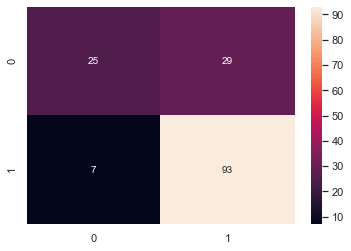

In [475]:
sns.heatmap(cm, annot=True)


**Plot dos parâmetros**

In [477]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [522]:
Modelo1 ={'Modelo':'Floresta aleatória',
            'Versão':'1',
            'Kernel':'Hyperparameter tuning',
            'Precision':precision_score(y_test,y_pred,average=None),
            'Recall':recall_score(y_test,y_pred,average=None),
            'F1 Score':f1_score(y_test,y_pred),
            'Acurácia':accuracy_score(y_test,y_pred),
            'AUC':roc_auc_score(y_test,y_pred)}

In [541]:
Modelo1

{'Modelo': 'Floresta aleatória',
 'Versão': '1',
 'Kernel': 'Hyperparameter tuning',
 'Precision': array([0.78125   , 0.76229508]),
 'Recall': array([0.46296296, 0.93      ]),
 'F1 Score': 0.8378378378378378,
 'Acurácia': 0.7662337662337663,
 'AUC': 0.6964814814814815}

### Novo modelo

Modelo XGBClassifier

In [537]:
# Modelo DecisionTreeClassifier
model = XGBClassifier(learning_rate=0.6)
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 75.40983606557377


In [538]:
y_pred_XGB = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_XGB)
cm

array([[29, 25],
       [12, 88]], dtype=int64)

In [539]:
Modelo2 ={'Modelo':'XGBClassifier',
            'Versão':'1',
            'Kernel':'learning_rate=0.6',
            'Precision':precision_score(y_test,y_pred_XGB,average=None),
            'Recall':recall_score(y_test,y_pred_XGB,average=None),
            'F1 Score':f1_score(y_test,y_pred_XGB),
            'Acurácia':accuracy_score(y_test,y_pred_XGB),
            'AUC':roc_auc_score(y_test,y_pred_XGB)}

In [540]:
Modelo2

{'Modelo': 'XGBClassifier',
 'Versão': '1',
 'Kernel': 'learning_rate=0.6',
 'Precision': array([0.70731707, 0.77876106]),
 'Recall': array([0.53703704, 0.88      ]),
 'F1 Score': 0.8262910798122066,
 'Acurácia': 0.7597402597402597,
 'AUC': 0.7085185185185184}